In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:

"""
questions.csv: metadata for the questions posed to users.

question_id: foreign key for the train/test content_id column, when the content type is question (0).

bundle_id: code for which questions are served together.

correct_answer: the answer to the question. Can be compared with the train user_answer column to check if the user was right.

part: the relevant section of the TOEIC test.

tags: one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together.

"""

In [142]:
questions = pd.read_csv("D:/Project_dataset/Pr_riid/questions.csv")
train = pd.read_csv('D:/Project_dataset/Pr_riid/train.csv', nrows=10**4)

In [352]:
display(questions[:50])
display(questions[50:100])
display(questions[100:150])



,question_id,bundle_id,correct_answer,part,tags,Wrong,Right
0,0,0,0,1,51 131 162 38,0,1
1,1,1,1,1,131 36 81,0,1
2,2,2,0,1,131 101 162 92,2,1
3,3,3,0,1,131 149 162 29,1,1
4,4,4,3,1,131 5 162 38,2,0
5,5,5,2,1,131 149 162 81,1,1
6,6,6,2,1,10 94 162 92,3,4
7,7,7,0,1,61 110 162 29,0,1
8,8,8,3,1,131 13 162 92,0,1
9,9,9,3,1,10 164 81,3,2


,question_id,bundle_id,correct_answer,part,tags,Wrong,Right
50,53,53,0,1,131 149 162 29,0,1
51,54,54,2,1,9 10 38,1,2
52,55,55,3,1,131 36 162 81,1,4
53,56,56,1,1,61 110 162 92,1,2
54,57,57,0,1,131 93 162 29,0,2
55,58,58,0,1,10 164 92,3,1
56,59,59,1,1,131 101 162 81,0,1
57,60,60,3,1,9 10 38,0,1
58,61,61,3,1,10 164 102,1,1
59,62,62,0,1,131 104 102,0,2


,question_id,bundle_id,correct_answer,part,tags,Wrong,Right
100,107,107,1,1,10 70 81,1,2
101,108,108,3,1,131 104 92,1,1
102,109,109,3,1,131 111 81,0,1
103,110,110,1,1,131 13 38,1,1
104,111,111,0,1,131 101 162 81,0,1
105,112,112,2,1,131 101 92,0,1
106,113,113,0,1,10 70 162 38,0,1
107,114,114,1,1,131 36 92,1,0
108,115,115,1,1,131 130 162 81,0,1
109,117,117,2,1,131 101 162 81,0,1


In [9]:
questions['tags']

0         51 131 162 38
1             131 36 81
2        131 101 162 92
3        131 149 162 29
4          131 5 162 38
              ...      
13518                14
13519                 8
13520                73
13521               125
13522                55
Name: tags, Length: 13523, dtype: object

In [6]:
train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
9995,9995,2868187305,91216,1124,0,775,0,0,18000.0,True
9996,9996,2868272689,91216,810,0,776,0,1,18000.0,True
9997,9997,2868367298,91216,1245,0,777,0,1,17000.0,True
9998,9998,2868439137,91216,711,0,778,3,1,17000.0,True


In [ ]:
#question_id : 각각의 문제 번호(train/test에 있는 content_id의 외래키)
#bundle_id :  문제 묶음
#tags : 이문제와 비슷한 유형의 문제
#part : 단원


In [4]:
questions[questions.question_id == 5692]


,question_id,bundle_id,correct_answer,part,tags
5692,5692,5692,3,5,151


In [5]:
questions[questions.bundle_id==11684]


,question_id,bundle_id,correct_answer,part,tags
11684,11684,11684,2,7,145 160 35 0 122
11685,11685,11684,3,7,145 160 35 0 122
11686,11686,11684,2,7,76 160 35 0 122
11687,11687,11684,0,7,160 35 0 122 165
11688,11688,11684,1,7,160 35 0 122 165


In [6]:
questions.correct_answer.value_counts()

0    3716
3    3544
1    3478
2    2785
Name: correct_answer, dtype: int64

In [11]:
questions.part.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [12]:
questions.part.value_counts()

5    5511
2    1647
3    1562
4    1439
6    1212
7    1160
1     992
Name: part, dtype: int64

---

In [9]:
questions.head()
questions.shape

(13523, 5)

In [13]:
questions[questions.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [330]:
#train.query('content_id == "10033" and answered_correctly != -1')
#query : 조건에 부합하는 데이터를 출력할때 사용(비교연산자, in연산자, 논리연산자, 외부 변수(또는 함수)참조 연산, 인덱스 검색, 문자열 부분검색)
questions = pd.read_csv("D:/Project_dataset/Pr_riid/questions.csv")
questions
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [331]:
questions['tags'] = questions['tags'].astype(str) #문자열로 타입 변환
tags = [i.split() for i in questions[questions.tags != 'nan'].tags.values] #결치값을 제외한 수치를 불러옴 
#print(tags)
tags = [item for elem in tags for item in elem] #리스트 하나에 모음
#print(tags)
tags = set(tags) #set으로 호출하여 중복값 제거
#print(tags)
tags = list(tags) #set의 데이터를 리스트로 변환
#print(tags)
len(tags) #중복되지 않은 tags의 수는 188개
questions.tags[1]

'131 36 81'

In [269]:
tags_list = [x.split() for x in questions.tags.values]
questions['tags'] = tags_list
questions.head()


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,"[51, 131, 162, 38]"
1,1,1,1,1,"[131, 36, 81]"
2,2,2,0,1,"[131, 101, 162, 92]"
3,3,3,0,1,"[131, 149, 162, 29]"
4,4,4,3,1,"[131, 5, 162, 38]"


In [332]:
correct = train[train.answered_correctly != -1].groupby(["content_id", 'answered_correctly'], as_index=False).size()
correct = correct.pivot(index= "content_id", columns='answered_correctly', values='size')
correct
correct.columns = ['Wrong', 'Right']
correct
correct = correct.fillna(0) #결측값을 0으로 채움
correct
correct[['Wrong', 'Right']] = correct[['Wrong', 'Right']].astype(int)
correct

questions = questions.merge(correct, left_on = "question_id", right_on = "content_id")
questions

,question_id,bundle_id,correct_answer,part,tags,Wrong,Right
0,0,0,0,1,51 131 162 38,0,1
1,1,1,1,1,131 36 81,0,1
2,2,2,0,1,131 101 162 92,2,1
3,3,3,0,1,131 149 162 29,1,1
4,4,4,3,1,131 5 162 38,2,0
...,...,...,...,...,...,...,...
6413,13503,13503,0,5,79,1,0
6414,13505,13505,0,5,1,0,1
6415,13510,13510,0,5,134,0,1
6416,13519,13519,3,5,8,0,1


In [277]:
questions.tags.values
len(tags)

['102',
 '140',
 '11',
 '46',
 '77',
 '104',
 '26',
 '174',
 '178',
 '159',
 '100',
 '85',
 '36',
 '45',
 '21',
 '44',
 '162',
 '97',
 '116',
 '136',
 '7',
 '141',
 '154',
 '182',
 '187',
 '137',
 '0',
 '146',
 '157',
 '59',
 '119',
 '96',
 '155',
 '122',
 '33',
 '80',
 '99',
 '94',
 '12',
 '117',
 '171',
 '112',
 '135',
 '82',
 '71',
 '41',
 '107',
 '101',
 '70',
 '130',
 '133',
 '183',
 '128',
 '60',
 '127',
 '106',
 '15',
 '105',
 '158',
 '142',
 '166',
 '68',
 '92',
 '61',
 '160',
 '185',
 '118',
 '73',
 '2',
 '8',
 '181',
 '95',
 '123',
 '111',
 '74',
 '29',
 '156',
 '28',
 '58',
 '180',
 '129',
 '86',
 '62',
 '37',
 '9',
 '14',
 '81',
 '147',
 '164',
 '88',
 '78',
 '89',
 '113',
 '1',
 '67',
 '138',
 '172',
 '55',
 '35',
 '176',
 '63',
 '139',
 '49',
 '27',
 '121',
 '91',
 '103',
 '64',
 '39',
 '50',
 '186',
 '84',
 '47',
 '98',
 '165',
 '148',
 '131',
 '170',
 '126',
 '177',
 '43',
 '32',
 '76',
 '17',
 '54',
 '184',
 '75',
 '19',
 '132',
 '31',
 '93',
 '18',
 '72',
 '175',
 '20

In [351]:
#tag당 문제 정답률을 나타내려고 작성한 코드
tags_df = pd.DataFrame()
for x in range(len(tags)): #
     df = questions[questions.tags.apply(lambda l: tags[x] in l)] # tags가 비슷한 행으로 묶음
     df1 = df.agg({'Wrong': ['sum'], 'Right': ['sum']}) #각열에 sum함수를 적용
     df1['Total_questions'] = df1.Wrong + df1.Right #Total_questions열 추가 값은 wrong,right를 합친 값 #총 문제의 수
     #df1['Question_ids_with_tag'] = len(df) #Question_ids_with_tag열 추가, 값은 len(df) //이거 왜쓰는지 모르겠음 안써도 될꺼같음
     df1['tag'] = tags[x] #tag 열 추가 값은 tag[x] : tags가 tag의 번치라면 tag는 낱개??
     df1 = df1.set_index('tag')
     tags_df = tags_df.append(df1)
df1
# tags_df.info() #삭제 예정
# tags_df[['Wrong', 'Right', 'Total_questions']] = tags_df[['Wrong', 'Right', 'Total_questions']].astype(int) # 타입 안바꿔도 될듯
# tags_df.info() #삭제 예정 
tags_df['Percent_correct'] = tags_df.Right/tags_df.Total_questions #'Percent_correct'열 추가 문제 맞춘 비율
tags_df = tags_df.sort_values(by = "Percent_correct")

tags_df
tags_df.dropna(inplace=True)  #결측치 제거 ex) 
tags_df

,Wrong,Right,Total_questions,Percent_correct
tag,,,,
24,22,9,31,0.290323
124,10,5,15,0.333333
121,3,2,5,0.400000
170,18,12,30,0.400000
161,48,47,95,0.494737
...,...,...,...,...
87,6,45,51,0.882353
130,2,33,35,0.942857
185,0,5,5,1.000000


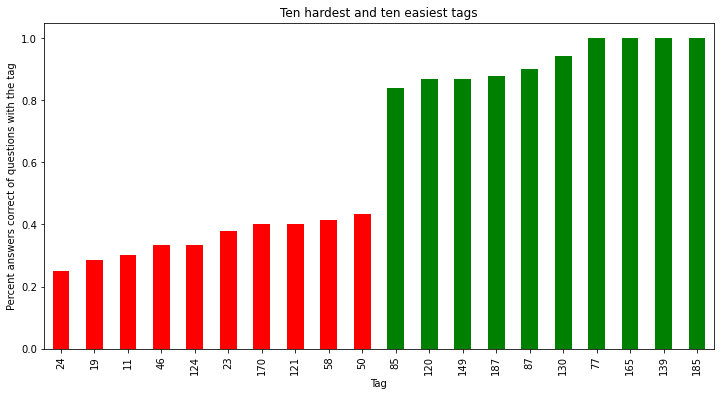

In [320]:
select_rows = list(range(0,10)) + list(range(176, len(tags_df))) # 0~9 + 176~188 마지막 결측치2개 포함
tags_select = tags_df.iloc[select_rows,3] #4가 의미하는게 무엇인지 모르겠음

fig = plt.figure(figsize=(12,6))
x = tags_select.index
y = tags_select.values
clrs = ['red' if y < 0.6 else 'green' for y in tags_select.values]
tags_select.plot.bar(x, y, color=clrs)
plt.title("Ten hardest and ten easiest tags")
plt.xlabel("Tag")
plt.ylabel("Percent answers correct of questions with the tag")
plt.xticks(rotation=90)
plt.show()

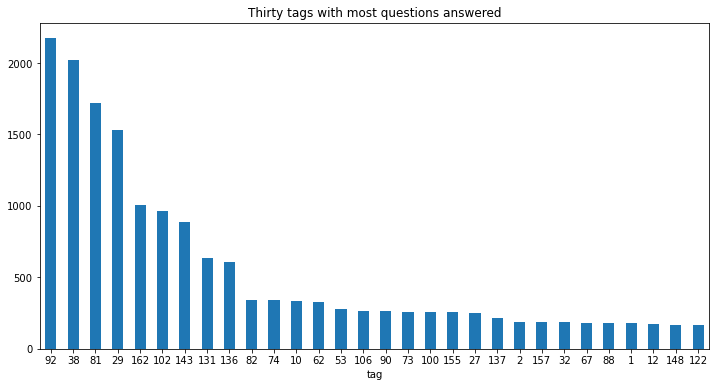

In [136]:
#태그당 사용된 횟수
tags_select = tags_df.sort_values(by = "Total_questions", ascending = False).iloc[:30,:]
tags_select = tags_select["Total_questions"]
tags_select

fig = plt.figure(figsize=(12,6))
ax = tags_select.plot.bar()
plt.title("Thirty tags with most questions answered")
plt.xticks(rotation=0) #90이 디폴트
plt.ticklabel_format(style='plain', axis='y')
#ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

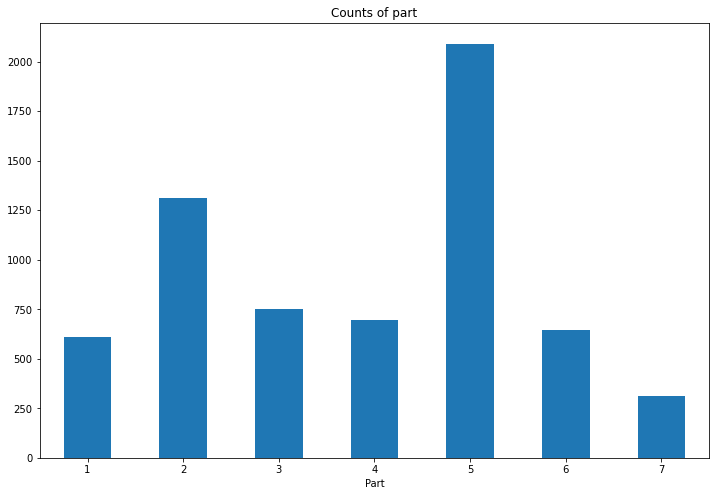

In [129]:
#파트별 문제수
plt.figure(figsize=(12,8))
questions.groupby('part').count()['question_id'].plot.bar()
plt.title("Counts of part")
plt.xlabel("Part")
plt.xticks(rotation=0)

<function matplotlib.pyplot.show(close=None, block=None)>

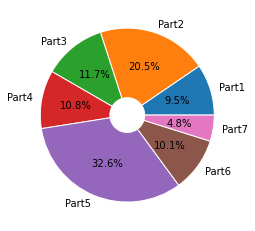

In [405]:
#파트당 문제 비율
labels = ['Part1','Part2','Part3','Part4','Part5', 'Part6', 'Part7']
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 1}
ratio = questions.groupby("part").count()['question_id']
plt.pie(ratio, labels=labels, autopct='%.1f%%',wedgeprops=wedgeprops)
plt.show

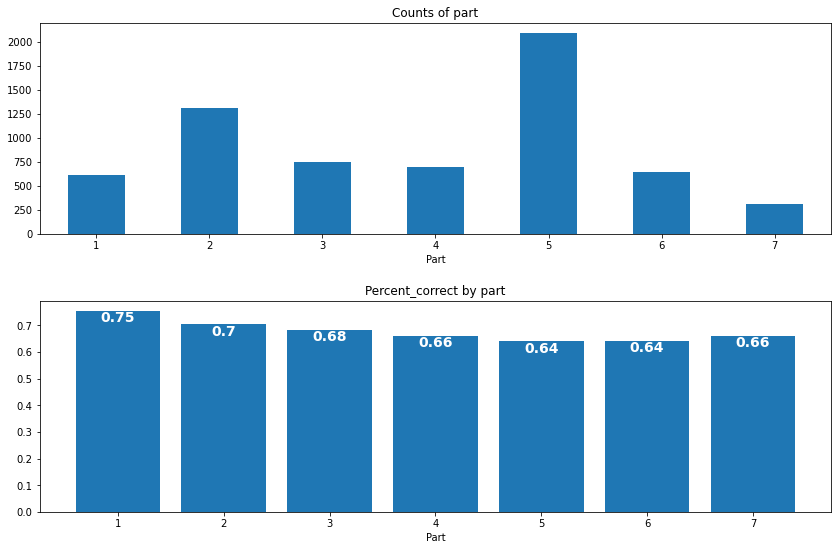

In [138]:
#파트별 문제수
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax1 = questions.groupby("part").count()['question_id'].plot.bar()
plt.title("Counts of part")
plt.xlabel("Part")
plt.xticks(rotation=0)

part = questions.groupby('part').agg({'Wrong': ['sum'], 'Right': ['sum']})
part['Percent_correct'] = part.Right/(part.Right + part.Wrong)
part = part.iloc[:,2]

#파트당 정답률
ax2 = fig.add_subplot(212)
plt.bar(part.index, part.values)
for i, v in zip(part.index, part.values):
    plt.text(i, v, round(v,2), color='white', fontweight='bold', fontsize=14, va='top', ha='center')

plt.title("Percent_correct by part")
plt.xlabel("Part")
plt.xticks(rotation=0)
plt.tight_layout(pad=2)
plt.show()

In [357]:
display(questions)
display(tags_df)

,question_id,bundle_id,correct_answer,part,tags,Wrong,Right
0,0,0,0,1,51 131 162 38,0,1
1,1,1,1,1,131 36 81,0,1
2,2,2,0,1,131 101 162 92,2,1
3,3,3,0,1,131 149 162 29,1,1
4,4,4,3,1,131 5 162 38,2,0
...,...,...,...,...,...,...,...
6413,13503,13503,0,5,79,1,0
6414,13505,13505,0,5,1,0,1
6415,13510,13510,0,5,134,0,1
6416,13519,13519,3,5,8,0,1


,Wrong,Right,Total_questions,Percent_correct
tag,,,,
24,22,9,31,0.290323
124,10,5,15,0.333333
121,3,2,5,0.400000
170,18,12,30,0.400000
161,48,47,95,0.494737
...,...,...,...,...
87,6,45,51,0.882353
130,2,33,35,0.942857
185,0,5,5,1.000000


AttributeError: 'Series' object has no attribute 'plt'

<function matplotlib.pyplot.show(close=None, block=None)>

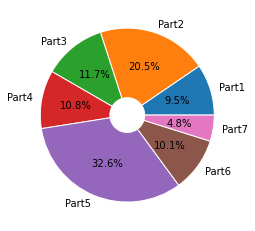